In [ ]:
#Load Libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Load Dataset

from google.colab import drive
import pandas as pd 
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/Dissertation/Datasets/LUFlow/2021.02.01.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dissertation/Datasets/LUFlow/2021.02.02.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dissertation/Datasets/LUFlow/2021.02.03.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dissertation/Datasets/LUFlow/2021.02.04.csv')

#Merge Data Sources into a single DF

dfFIN = pd.concat([df1,df2,df3,df4])

#Delete Data shards

del df1,df2,df3,df4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Pre-processing Dataset
   
#Drop Missing Values

dfFIN.dropna(axis=0,inplace=True,how="any")

#Delete Columns

dfFIN.drop(["src_ip","dest_ip","time_end","time_start","avg_ipt","total_entropy"],axis=1,inplace=True)

#View Dataset

dfFIN.info()
dfFIN.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3644586 entries, 0 to 372479
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bytes_in      int64  
 1   bytes_out     int64  
 2   dest_port     float64
 3   entropy       float64
 4   num_pkts_out  int64  
 5   num_pkts_in   int64  
 6   proto         int64  
 7   src_port      float64
 8   label         object 
 9   duration      float64
dtypes: float64(4), int64(5), object(1)
memory usage: 305.9+ MB


,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_port,label,duration
0,0,89,59955.0,3.755549,1,0,6,445.0,malicious,0.000000
1,0,8688,9200.0,2.759309,6,4,6,32870.0,benign,0.001297
2,13032,0,32870.0,2.373670,1,9,6,9200.0,benign,0.000117
3,1,18,4844.0,4.037400,3,1,6,5900.0,outlier,0.119391
4,0,0,32874.0,0.000000,1,0,6,9200.0,benign,0.000000
5,0,8070,9200.0,2.886906,6,2,6,32870.0,benign,0.000618
6,0,11584,9200.0,2.231618,8,0,6,32840.0,benign,0.000056
7,0,0,6937.0,0.000000,1,0,6,5900.0,outlier,0.000000
8,0,0,32876.0,0.000000,1,0,6,9200.0,benign,0.000000
9,0,190,9200.0,5.155881,1,0,6,32882.0,benign,0.000000


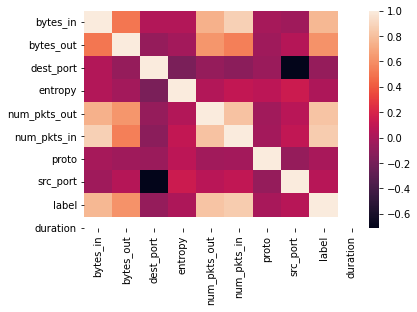

In [ ]:
#Get co-relation between the features

dfFIN.corr()

#Heatmap
sns.heatmap(dfFIN.corr(),
            xticklabels=dfFIN.columns,
            yticklabels=dfFIN.columns
           )

In [ ]:
from sklearn.model_selection import train_test_split

#Split DF into X and Y

x=dfFIN[['bytes_in','bytes_out','dest_port','entropy','num_pkts_out','num_pkts_in','proto','src_port','duration']]
y=dfFIN['label']

#Split train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

#Scaling the Data

s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(np.float))
x_test = s_scaler.transform(x_test.astype(np.float))


In [ ]:
#Model 1 (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
knn.fit(x_train[:300000],y_train[:300000])
y_pred=knn.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))

#Print Predictions v/s Actual Values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

Accuracy= 0.8413635004211723


,Actual,Predicted
622796,outlier,malicious
1012733,benign,benign
473808,malicious,malicious
712328,outlier,malicious
448873,outlier,malicious
125996,malicious,malicious
57026,benign,benign
18677,benign,benign
104475,benign,benign
966454,benign,benign


In [ ]:
#Save model into pickle file 

#import pickle 
#pickle.dump(knn, open('knnIDS.pkl', 'wb'))

In [ ]:
#Model 2 (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve , classification_report,auc
log = LogisticRegression()
model = log.fit(x_train[:300000],y_train[:300000])
y_pred = model.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))

#Print Predictions v/s Actual Values

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df.head(20)
df2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy= 0.698768585766849


,Actual,Predicted
622796,outlier,malicious
1012733,benign,benign
473808,malicious,malicious
712328,outlier,malicious
448873,outlier,malicious
125996,malicious,malicious
57026,benign,benign
18677,benign,benign
104475,benign,benign
966454,benign,benign
